In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
import datetime as dt



In [24]:
df = pd.read_csv('Fire.csv')

df

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL SAVED,PERCENTAGE LOSS,SPRINKLER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng,TOTAL LOSS,Dist to 1st Station (mi),Dist to 2nd Station (mi)
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783,5000,1.01,1.23
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108,10000,0.97,1.26
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020,20000,1.88,2.06
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435,12000,0.28,1.43
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816,55000,0.46,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285,17500,0.71,1.65
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2237763.0,0.11,NaN,NaN,5307 GASTON AVE,32.803882,-96.765385,2500,0.78,0.97
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357630.0,0.00,YES,NaN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209,200,0.68,1.01
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056,600,2.67,5.37


# Spliting time column

made three different columns out of time. I ommited the minutes and did a group on am/pm, hour.mean with percentage lost. 

In [25]:
df[['HOUR', 'AM/PM']] = df['TIME'].str.split(':', expand=True)
df

df[['MINUTE', 'AM/PM']] = df['AM/PM'].str.split(' ', expand=True,)

df_group = df.groupby(["AM/PM", "HOUR"]).mean()

percentage_loss_groupby = df_group.groupby(["PERCENTAGE LOSS"]).count()

percentage_loss_groupby

series = df_group.groupby(["AM/PM", "HOUR"]).mean()["PERCENTAGE LOSS"]

series

AM/PM  HOUR
AM     01      18.638261
       02      11.498387
       03      18.263000
       04       9.511481
       05      26.293571
       06      28.976000
       07       7.424286
       08       9.340800
       09       5.676500
       10      11.146818
       11       9.260455
       12      18.375897
PM     01       7.277273
       02      10.803158
       03      16.320400
       04       4.195200
       05      11.324333
       06       9.019118
       07       6.026129
       08       8.875000
       09       4.880345
       10      14.150769
       11       7.213871
       12      11.923043
Name: PERCENTAGE LOSS, dtype: float64

# Time Frequency vs Percentage Loss Bar

This is a chart that shows what the average percentage loss per incident per hour. 

<BarContainer object of 24 artists>

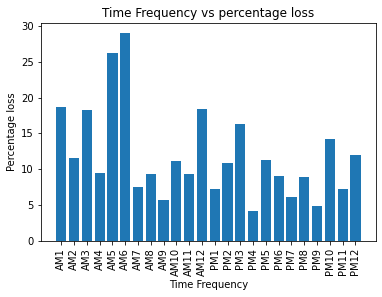

In [27]:
list(series.index)


newl = []
for index, item in enumerate(series.index):
     newl.append(item[0] + str(index % 12 + 1))
        

# for index in range( len(series)):
#      newl.append(series.index[index][0] + str(index+1))

plt.xlabel("Time Frequency")
plt.ylabel("Percentage loss")
plt.title("Time Frequency vs percentage loss")
plt.xticks(rotation=90)
newl
plt.bar(newl, series)

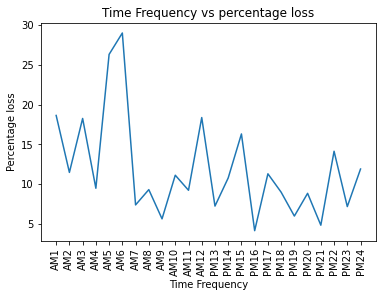

In [28]:
list(series.index)


newl = []
for index, item in enumerate(series.index):
     newl.append(item[0] + str(index + 1))
        

# for index in range( len(series)):
#      newl.append(series.index[index][0] + str(index+1))

plt.xlabel("Time Frequency")
plt.ylabel("Percentage loss")
plt.title("Time Frequency vs percentage loss")
plt.xticks(rotation=90)
newl
plt.plot(newl, series)

In [31]:
show = df.columns
show

Index(['index', 'ID', 'DATE', 'TIME', 'ZIP', 'BATTALION', 'SHIFT',
       'COUNCIL DISTRICT', 'STRUCTURE TYPE', 'BUILDING STORIES',
       'CONSTRUCTION', 'CAUSE', 'TOTAL VALUE', 'STRUCTURE LOSS',
       'CONTENTS LOSS', 'TOTAL SAVED', 'PERCENTAGE LOSS', 'SPRINKLER SYSTEM',
       'ALARM SYSTEM', 'ADDRESS', 'Lat', 'Lng', 'TOTAL LOSS',
       'Dist to 1st Station (mi)', 'Dist to 2nd Station (mi)', 'HOUR', 'AM/PM',
       'MINUTE'],
      dtype='object')

<BarContainer object of 32 artists>

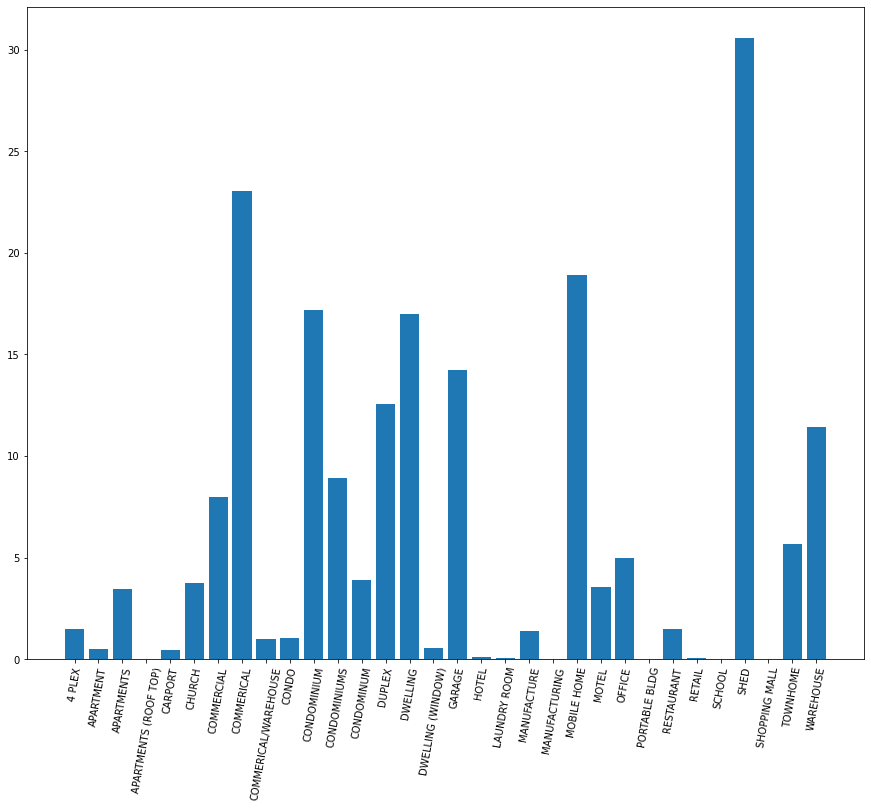

In [32]:
# For structure type v % Loss
gk = df.groupby("STRUCTURE TYPE").mean()
plt.figure(figsize=(15, 12))
plt.xticks(rotation=80)
plt.bar(gk.index, gk["PERCENTAGE LOSS"])
#df.boxplot("PERCENTAGE LOSS")
#plt.boxplot(df["PERCENTAGE LOSS"])